# FINM 36700 Homework 8

## Andrew Arbitman, Arush Guliani, Tiago Mambrim Flora, Colin Yao

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [293]:
def load_files(LOADFILE, sheet_name):
  df = pd.read_excel(LOADFILE, sheet_name=sheet_name, index_col = 0)
  return df

## LCTM Case Study

In [294]:
lctm_exhibit_2 = load_files('ltcm_exhibits_data.xlsx', 'Exhibit 2')
lctm_exhibit_4 = load_files('ltcm_exhibits_data.xlsx', 'Exhibit 4')
spy_prices = load_files('spy_data.xlsx', 'prices')
spy_total_returns = load_files('spy_data.xlsx', 'total returns')
spy_excess_returns = load_files('spy_data.xlsx', 'excess returns')

In [295]:
FREQ = 12

In [296]:
#Clean the data
lctm_exhibit_2.columns = [
    "Fund Capital (Billions)", 
    "Gross Monthly Performance", 
    "Net Monthly Performance", 
    "Index of Net Performance"
]
lctm_exhibit_2.drop(lctm_exhibit_2.index[:3], inplace=True)

lctm_exhibit_4.columns = [
    "Total Assets (Billions)",
    "Total Capital (Billions)",
    "Leverage Ratio",
    "Capital Ratio",
]
lctm_exhibit_4.drop(lctm_exhibit_4.index[:2], inplace=True)

### 2. Fund Performance and Attribution

#### 2.1

For both the gross and net series of LTCM excess returns, report the annualized

- mean

- volatility

- Sharpe ratios

Also report the

- skewness

- kurtosis

- 5th quantile

In [297]:
gross_lctm_mean = lctm_exhibit_2["Gross Monthly Performance"].mean() * FREQ
gross_lctm_vol = lctm_exhibit_2["Gross Monthly Performance"].std() * np.sqrt(FREQ)
gross_lctm_sharpe = gross_lctm_mean / gross_lctm_vol
gross_lctm_skewness = lctm_exhibit_2["Gross Monthly Performance"].skew()
gross_lctm_kurtosis = lctm_exhibit_2["Gross Monthly Performance"].kurtosis()
gross_lctm_5th_quantile = lctm_exhibit_2["Gross Monthly Performance"].quantile(0.05)

net_lctm_mean = lctm_exhibit_2["Net Monthly Performance"].mean() * FREQ
net_lctm_vol = lctm_exhibit_2["Net Monthly Performance"].std() * np.sqrt(FREQ)
net_lctm_sharpe = net_lctm_mean / net_lctm_vol
net_lctm_skewness = lctm_exhibit_2["Net Monthly Performance"].skew()
net_lctm_kurtosis = lctm_exhibit_2["Net Monthly Performance"].kurtosis()
net_lctm_5th_quantile = lctm_exhibit_2["Net Monthly Performance"].quantile(0.05)

lctm_stats = pd.DataFrame({
    "Gross Monthly Performance": [gross_lctm_mean, gross_lctm_vol, gross_lctm_sharpe, gross_lctm_skewness, gross_lctm_kurtosis, gross_lctm_5th_quantile],
    "Net Monthly Performance": [net_lctm_mean, net_lctm_vol, net_lctm_sharpe, net_lctm_skewness, net_lctm_kurtosis, net_lctm_5th_quantile]
})
lctm_stats.index = ["Mean", "Volatility", "Sharpe Ratio", "Skewness", "Kurtosis", "5th Quantile"]
lctm_stats

,Gross Monthly Performance,Net Monthly Performance
Mean,0.293887,0.207170
Volatility,0.136354,0.111904
Sharpe Ratio,2.155321,1.851315
Skewness,-0.296428,-0.817870
Kurtosis,1.569354,2.905537
5th Quantile,-0.026400,-0.022400


#### 2.2

Comment on how these stats compare to SPY and other assets we have seen.

How much do they differ between gross and net?

In [298]:
spy_mean = spy_excess_returns["SPY"].mean() * FREQ
spy_vol = spy_excess_returns["SPY"].std() * np.sqrt(FREQ)
spy_sharpe = spy_mean / spy_vol
spy_skewness = spy_excess_returns["SPY"].skew()
spy_kurtosis = spy_excess_returns["SPY"].kurtosis()
spy_5th_quantile = spy_excess_returns["SPY"].quantile(0.05)
spy_stats = pd.DataFrame({
    "SPY": [spy_mean, spy_vol, spy_sharpe, spy_skewness, spy_kurtosis, spy_5th_quantile]
})
spy_stats.index = ["Mean", "Volatility", "Sharpe Ratio", "Skewness", "Kurtosis", "5th Quantile"]
spy_stats

,SPY
Mean,0.071563
Volatility,0.149872
Sharpe Ratio,0.477494
Skewness,-0.559686
Kurtosis,0.893472
5th Quantile,-0.074058


As you can see, the mean and Sharpe ratio are much better in the LCTM exhibit than for SPY. It also has a better Sharpe ratio than basically every other asset we have seen as a part of this course.

As for the difference between gross and net, it is quite noticable despite it still having great performance. The Sharpe ratio for gross is 2.16 while the Sharpe ratio for net is 1.85. The skewness and kurtosis are very different for net and gross, with gross having a skewness of -0.3 and kurtosis of 1.57 and net having a skewness of -0.82 and a kurtosis of 2.91. 

#### 2.3

Estimate a linear factor decomposition of net LTCM excess returns on SPY excess returns.

Report

- annualized alpha

- beta

- r-squared

Does LTCM deliver performance beyond SPY?

In [299]:
#Adjust the dates to match, and drop the na's
spy_benchmark = spy_excess_returns.loc["1994-03-01":"1998-07-31"]
lctm_net = lctm_exhibit_2['Net Monthly Performance'].dropna()

In [300]:
y = lctm_net
X = spy_benchmark.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_[0]
r_squared = model.score(X, y)
print(f"Annualized Alpha: {alpha:.4f}")
print(f"Beta: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")

Annualized Alpha: 0.1850
Beta: 0.1430
R-squared: 0.0212


Yes, LCTM delivers performance beyond SPY, with an annualized alpha of 18.5%, which is very large.

#### 2.4

Let’s check for non-linear market exposure. Run the following regression on LTCM’s net excess returns:

Report

- annualized alpha

- the linear and quadratic betas

- r-squared

In [301]:
squared_spy_benchmark = spy_benchmark ** 2
y = lctm_net
X = np.hstack([spy_benchmark, squared_spy_benchmark])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
betas = model.coef_
r_squared = model.score(X, y)
print(f"Annualized Alpha: {alpha:.4f}")
print(f"Linear Beta: {betas[0]:.4f}")
print(f"Quadratic Beta: {betas[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Annualized Alpha: 0.2130
Linear Beta: 0.1712
Quadratic Beta: -2.1870
R-squared: 0.0285


#### 2.5

- Does the quadratic market factor do much to increase the overall LTCM variation explained by the market?

- From the regression evidence, does LTCM’s market exposure behave as if it is long market options or short market options?

- Should we describe LTCM as being positively or negatively exposed to market volatility?

The quadratic market factor modestly increases the variation in LTCM returns explained by the market (see the increase in R-squared compared to the linear model), but the improvement is not dramatic. The R^2 of the regression with just the linear market factor is 0.0212 while the R^2 of the regression with both the linear and quadratic market factors is 0.0285.

Based on the negative and significant quadratic beta, LTCM's market exposure behaves as if it is short market options: it benefits less (or loses more) as market returns become more extreme in either direction, which is characteristic of an implicit short volatility or short convexity profile.

Thus, we should describe LTCM as being negatively exposed to market volatility.

#### 2.6

Let’s try to pinpoint the nature of LTCM’s nonlinear exposure. Does it come more from exposure to up-markets or down-markets? Run the following regression on LTCM’s net excess returns:

where k1 = 0.03 and k2 = -0.03.

Report

- annualized alpha

- market beta, the up and down betas

- r-squared

In [302]:
call_option_benchmark = np.maximum((spy_benchmark - 0.03), 0)
put_option_benchmark = np.maximum((-0.03 - spy_benchmark), 0)
y = lctm_net
X = np.hstack([spy_benchmark, call_option_benchmark, put_option_benchmark])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
betas = model.coef_
r_squared = model.score(X, y)
print(f"Annualized Alpha: {alpha:.4f}")
print(f"Market Beta: {betas[0]:.4f}")
print(f"Up Beta: {betas[1]:.4f}")
print(f"Down Beta: {betas[2]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Annualized Alpha: 0.1594
Market Beta: 0.4387
Up Beta: -0.7288
Down Beta: 1.0463
R-squared: 0.0496


#### 2.7

- Is LTCM long or short the call-like factor? And the put-like factor?

- Which factor moves LTCM more, the call-like factor, or the put-like factor?

- In the previous problem, you commented on whether LTCM is positively or negatively exposed to market volatility. Using this current regression, does this volatility exposure come more from being long the market’s upside? Short the market’s downside? Something else?

LCTM’s up beta is negative (-0.73), so it is short the call-like factor, and its down beta is positive (1.05), so it is long the put-like factor.

The absolute value of the down beta (1.05) is larger than that of the up beta (0.73), so LCTM is moved more by the put-like factor.
 
The majority of LCTM’s volatility exposure in this regression comes from being short the market’s upside and long the market’s downside.

## Exercise 8.1

In [303]:
spx_data = load_files('spx_data_weekly.xlsx', 'spx data')
sector_data = load_files('spx_data_weekly.xlsx', 'sector data')
additional_data = load_files('spx_data_weekly.xlsx', 'additional data')
rates_data = load_files('spx_data_weekly.xlsx', 'rates data')

In [304]:
FREQ = 52

In [305]:
#Drop the first two rows of the dataframe
spx_data = spx_data.iloc[2:]

In [306]:
spx_px_last = pd.DataFrame()
spx_eqy_dvd_yld_ind = pd.DataFrame()
spx_pe_ratio = pd.DataFrame()
for i in range(len(spx_data.columns)):
    if i % 3 == 0:
        ticker = spx_data.columns[i]
        spx_px_last[ticker] = spx_data.iloc[:, i]
    elif i % 3 == 1:
        spx_eqy_dvd_yld_ind[ticker] = spx_data.iloc[:, i]
    else:
        spx_pe_ratio[ticker] = spx_data.iloc[:, i]

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2132115387.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spx_px_last[ticker] = spx_data.iloc[:, i]
/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2132115387.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spx_eqy_dvd_yld_ind[ticker] = spx_data.iloc[:, i]
/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2132115387.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [307]:
spx_px_last.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
2015-07-03 00:00:00,36.4044,28.2589,44.2648,NaN,40.4951,21.6742,81.6872,80.75,52.257,35.923,...,21.2866,90.2725,23.8413,52.6941,32.3159,NaN,54.2752,96.5853,112.43,44.5029
2015-07-10 00:00:00,36.2388,27.5527,44.9267,NaN,40.9213,21.9975,82.9041,80.59,49.9275,34.8597,...,20.9189,90.5864,24.3716,52.111,31.1369,NaN,53.8662,95.3533,109.75,43.2593
2015-07-17 00:00:00,36.7447,28.9696,45.757,NaN,41.0942,21.9658,84.3309,82.1,50.6986,35.4578,...,20.3774,88.677,24.4805,52.3582,31.5064,NaN,52.3327,95.9693,114.18,44.0331
2015-07-24 00:00:00,36.156,27.8253,44.5083,NaN,42.0413,22.2732,84.91,80.98,47.4761,34.8449,...,19.9027,89.3047,23.8703,50.666,30.4682,NaN,51.636,95.2194,110.89,45.59
2015-07-31 00:00:00,37.6645,27.1101,45.7701,NaN,41.7448,22.6187,86.5382,81.99,47.3463,35.0147,...,20.5178,90.0022,25.1852,50.2033,30.3803,NaN,52.2613,92.9072,107.63,45.1201


In [308]:
spx_eqy_dvd_yld_ind.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
2015-07-03 00:00:00,1.0988,1.8401,4.6086,NaN,2.3707,NaN,2.4973,NaN,3.0618,3.1178,...,5.4494,2.2155,5.3688,5.5414,1.7428,NaN,3.0216,0.9111,NaN,0.746
2015-07-10 00:00:00,1.1038,1.8873,4.5407,NaN,2.346,NaN,2.4607,NaN,3.2046,3.2129,...,5.5452,2.2078,5.252,5.6034,1.8088,NaN,3.0446,0.9229,NaN,0.7675
2015-07-17 00:00:00,1.0886,1.795,4.4583,NaN,2.3361,NaN,2.419,NaN,3.1559,3.1587,...,5.6926,2.2554,5.2286,5.577,1.7876,NaN,3.1338,0.917,NaN,0.754
2015-07-24 00:00:00,1.1063,1.8688,4.5834,NaN,2.2835,NaN,2.4025,NaN,3.3701,3.2142,...,5.8284,2.2395,5.3623,5.7632,1.8485,NaN,3.1761,0.9242,NaN,0.7282
2015-07-31 00:00:00,1.062,1.9181,4.4571,NaN,2.2997,NaN,2.3573,NaN,3.3794,3.1987,...,5.6536,2.2222,5.0824,5.8164,1.8538,NaN,3.1381,0.9472,NaN,0.7358


In [309]:
spx_pe_ratio.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
2015-07-03 00:00:00,27.472,13.0592,11.9239,NaN,21.6464,11.8201,17.2055,112.3139,20.1826,10.3845,...,20.8556,19.6556,12.1268,9.4981,16.9065,NaN,18.6689,18.2975,151.5166,26.8168
2015-07-10 00:00:00,27.3471,12.7328,12.1022,NaN,21.8742,11.9964,17.4618,112.0914,19.2828,10.0771,...,20.4954,19.724,12.3966,9.393,16.2897,NaN,18.5282,18.0642,147.9049,26.0674
2015-07-17 00:00:00,27.7288,13.3876,12.3258,NaN,21.9667,11.9791,17.7623,114.1916,19.5806,10.25,...,19.9648,19.3082,12.452,9.4376,16.4831,NaN,18.0008,18.1809,153.875,26.5337
2015-07-24 00:00:00,27.2846,12.8588,11.9895,NaN,22.4729,12.1468,17.8843,112.6338,18.3361,10.0728,...,19.4997,19.4449,12.1416,9.1326,15.9399,NaN,17.7611,18.0388,149.4412,27.4718
2015-07-31 00:00:00,26.6192,12.5283,12.3294,NaN,22.3145,12.3352,18.2272,114.0386,17.3337,10.1219,...,20.1023,19.5968,12.8104,9.0492,15.8939,NaN,17.9762,17.6008,145.0478,27.1887


#### 1.0

Filter the data to drop any ticker which does not have at least 5 years of continuous price data.

In [310]:
def continuous_data_5_years(column) -> bool:
    # Check for a window of 5*FREQ continuous non-NaN values anywhere in the column
    count = 0
    max_count = 0
    for val in column:
        if pd.notna(val):
            count += 1
            if count > max_count:
                max_count = count
        else:
            count = 0
    return max_count >= 5 * FREQ

In [311]:
tickers_to_delete = set()
for ticker in spx_px_last.columns:
    if not continuous_data_5_years(spx_px_last[ticker]):
        tickers_to_delete.add(ticker)
for ticker in spx_eqy_dvd_yld_ind.columns:
    if not continuous_data_5_years(spx_eqy_dvd_yld_ind[ticker]):
        tickers_to_delete.add(ticker)
for ticker in spx_pe_ratio.columns:
    if not continuous_data_5_years(spx_pe_ratio[ticker]):
        tickers_to_delete.add(ticker)
tickers_to_delete = list(tickers_to_delete)

In [312]:
for ticker in tickers_to_delete:
    spx_px_last = spx_px_last.drop(ticker, axis=1)
    spx_eqy_dvd_yld_ind = spx_eqy_dvd_yld_ind.drop(ticker, axis=1)
    spx_pe_ratio = spx_pe_ratio.drop(ticker, axis=1)
print(spx_px_last.shape)
print(spx_eqy_dvd_yld_ind.shape)
print(spx_pe_ratio.shape)

(522, 346)
(522, 346)
(522, 346)


#### 1.1

Report the highest and lowest dividend-yielding stocks…

- for any given date across the entire panel

- taking an average of the past year

Which stocks were they? Was it driven more by changes in D or P?

In [313]:
spx_eqy_dvd_yld_ind.head()

,A,AAPL,ABBV,ABT,ACN,ADI,ADM,ADP,AEE,AEP,...,WRB,WSM,WST,WTW,XEL,XOM,XYL,YUM,ZBH,ZTS
2015-07-03 00:00:00,1.0988,1.8401,4.6086,2.3707,2.4973,3.0618,3.1178,3.0251,5.7912,5.6748,...,1.0943,2.1691,0.7985,3.0813,5.3688,5.5414,1.7428,3.0216,0.9111,0.746
2015-07-10 00:00:00,1.1038,1.8873,4.5407,2.346,2.4607,3.2046,3.2129,2.9995,5.7141,5.539,...,1.0597,2.1402,0.7669,3.0734,5.252,5.6034,1.8088,3.0446,0.9229,0.7675
2015-07-17 00:00:00,1.0886,1.795,4.4583,2.3361,2.419,3.1559,3.1587,2.9679,5.6604,5.5231,...,1.058,2.1412,0.8212,3.0728,5.2286,5.577,1.7876,3.1338,0.917,0.754
2015-07-24 00:00:00,1.1063,1.8688,4.5834,2.2835,2.4025,3.3701,3.2142,3.065,5.7867,5.6364,...,1.0576,2.2054,0.8368,3.1273,5.3623,5.7632,1.8485,3.1761,0.9242,0.7282
2015-07-31 00:00:00,1.062,1.9181,4.4571,2.2997,2.3573,3.3794,3.1987,3.0653,5.4275,5.4401,...,1.0699,2.1155,0.8358,3.1065,5.0824,5.8164,1.8538,3.1381,0.9472,0.7358


In [314]:
dividend_stats_per_date = []

for date in spx_eqy_dvd_yld_ind.index:
    max_dividend = spx_eqy_dvd_yld_ind.loc[date].max()
    min_dividend = spx_eqy_dvd_yld_ind.loc[date].min()
    max_dividend_stock = spx_eqy_dvd_yld_ind.loc[date].idxmax()
    min_dividend_stock = spx_eqy_dvd_yld_ind.loc[date].idxmin()
    dividend_stats_per_date.append({
        'Date': date,
        'Max Dividend': max_dividend,
        'Min Dividend': min_dividend,
        'Max Dividend Stock': max_dividend_stock,
        'Min Dividend Stock': min_dividend_stock
    })

dividend_stats_per_date = pd.DataFrame(dividend_stats_per_date).set_index('Date')
dividend_stats_per_date

,Max Dividend,Min Dividend,Max Dividend Stock,Min Dividend Stock
Date,,,,
2015-07-03,20.8790,0.0270,DD,CI
2015-07-10,20.8668,0.0277,DD,CI
2015-07-17,20.9647,0.0284,DD,CI
2015-07-24,23.3362,0.0299,DD,CI
2015-07-31,22.7957,0.0302,DD,CI
...,...,...,...,...
2025-05-30,10.2396,0.0296,DOW,NVDA
2025-06-06,9.9491,0.0282,DOW,NVDA
2025-06-13,9.4999,0.0282,DOW,NVDA


In [315]:
dividend_stats_rolling_year = []

for date in spx_eqy_dvd_yld_ind.index:
    if date - spx_eqy_dvd_yld_ind.index[0] >= pd.Timedelta(days=365):
        rolling_year = spx_eqy_dvd_yld_ind[date-pd.Timedelta(days=365):date]
        rolling_means = rolling_year.mean()
        max_dividend = rolling_means.max()
        min_dividend = rolling_means.min()
        max_dividend_stock = rolling_means.idxmax()
        min_dividend_stock = rolling_means.idxmin()
        dividend_stats_rolling_year.append({
            'Date': date,
            'Max Dividend': max_dividend,
            'Min Dividend': min_dividend,
            'Max Dividend Stock': max_dividend_stock,
            'Min Dividend Stock': min_dividend_stock
        })

dividend_stats_rolling_year = pd.DataFrame(dividend_stats_rolling_year).set_index('Date')
dividend_stats_rolling_year

,Max Dividend,Min Dividend,Max Dividend Stock,Min Dividend Stock
Date,,,,
2016-07-08,23.140868,0.031743,DD,CI
2016-07-15,23.157502,0.031845,DD,CI
2016-07-22,23.164100,0.031872,DD,CI
2016-07-29,23.121832,0.031943,DD,CI
2016-08-05,23.089985,0.032013,DD,CI
...,...,...,...,...
2025-05-30,8.160391,0.032196,MO,NVDA
2025-06-06,8.115958,0.032040,MO,NVDA
2025-06-13,8.071968,0.031947,MO,NVDA


This was driven more by changes in D than by changes in P.

#### 1.2

For this strategy, use the dvd yld data.

Build a portfolio where at every time t, you set weights, w_t, that invest

- long the highest ranking 20% stocks.

For now, go equal weights of 0.01 in any stock for which you’re long or short.

In [316]:
spx_returns = spx_px_last.pct_change()
spx_returns.drop(spx_returns.index[0], inplace=True)

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/1862831596.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spx_returns = spx_px_last.pct_change()


In [317]:
long_only_portfolio_returns = []

for i in range(len(spx_eqy_dvd_yld_ind.index) - 1):
    # Get the dividend yield data for this time
    row_data = pd.to_numeric(spx_eqy_dvd_yld_ind.iloc[i], errors='coerce')
    # Select the top 20% stocks by dividend yield
    top_20_percent = int(0.2 * row_data.count())
    top_20_percent_stocks = row_data.nlargest(top_20_percent).index

    # Only include in the portfolio the intersection of top yields and stocks that are present in the returns (also drop NaNs)
    valid_stocks = top_20_percent_stocks.intersection(spx_returns.columns)
    # Obtain next period's returns for those stocks (align indices)
    period_returns = spx_returns.iloc[i][valid_stocks].dropna()
    # If there are any valid stocks for this period:
    if not period_returns.empty:
        weights = pd.Series(0.01, index=period_returns.index)
        pnl = (weights * period_returns).sum()
        long_only_portfolio_returns.append(pnl)
    else:
        long_only_portfolio_returns.append(np.nan)

# Build a proper pd.Series and set the index to match the returns
long_only_portfolio_returns = pd.Series(long_only_portfolio_returns, index=spx_returns.index[:len(long_only_portfolio_returns)])
long_only_portfolio_returns

2015-07-10    0.006654
2015-07-17    0.005095
2015-07-24   -0.014813
2015-07-31    0.015996
2015-08-07   -0.005448
                ...   
2025-05-30    0.009014
2025-06-06    0.004673
2025-06-13   -0.002511
2025-06-20   -0.001250
2025-06-27    0.008806
Length: 521, dtype: float64

#### 1.3

Re-do the strategy of the previous section, but this time go long and short

At any given time, t, set the vector w_t as follows

- long the highest-ranking 20% of stocks.

- short the lowest-ranking 20% of stocks.

- take no position in all other stocks.

In [318]:
long_short_portfolio_returns = []

for i in range(len(spx_eqy_dvd_yld_ind.index) - 1):
    # Get the dividend yield data for this time
    row_data = pd.to_numeric(spx_eqy_dvd_yld_ind.iloc[i], errors='coerce')
    # Select the top 20% stocks by dividend yield
    top_20_percent = int(0.2 * row_data.count())
    bottom_20_percent = int(0.2 * row_data.count())
    top_20_percent_stocks = row_data.nlargest(top_20_percent).index
    bottom_20_percent_stocks = row_data.nsmallest(bottom_20_percent).index

    # Only include in the portfolio the intersection of top yields and stocks that are present in the returns (also drop NaNs)
    valid_stocks_long = top_20_percent_stocks.intersection(spx_returns.columns)
    valid_stocks_short = bottom_20_percent_stocks.intersection(spx_returns.columns)
    # Obtain next period's returns for those stocks (align indices)
    period_returns_long = spx_returns.iloc[i][valid_stocks_long].dropna()
    period_returns_short = spx_returns.iloc[i][valid_stocks_short].dropna()
    # If there are any valid stocks for this period:
    if not period_returns_long.empty and not period_returns_short.empty:
        weights_long = pd.Series(0.01, index=period_returns_long.index)
        weights_short = pd.Series(-0.01, index=period_returns_short.index)
        pnl = (weights_long * period_returns_long).sum() + (weights_short * period_returns_short).sum()
        long_short_portfolio_returns.append(pnl)
    else:
        long_short_portfolio_returns.append(np.nan)

# Build a proper pd.Series and set the index to match the returns
long_short_portfolio_returns = pd.Series(long_short_portfolio_returns, index=spx_returns.index[:len(long_short_portfolio_returns)])
long_short_portfolio_returns

2015-07-10    0.006111
2015-07-17   -0.000756
2015-07-24   -0.004525
2015-07-31    0.007571
2015-08-07   -0.001570
                ...   
2025-05-30    0.000036
2025-06-06   -0.002614
2025-06-13    0.005318
2025-06-20   -0.002258
2025-06-27   -0.009915
Length: 521, dtype: float64

#### 1.4

Calculate the return of your portfolio over time.

Report the following annualized stats

- mean

- volatility

- Sharpe

Also calculate the tail-risk stats

- skewness

- VaR (5th quantile)

- CVaR (5th quantile)

- max drawdown

In [319]:
def mdd_timeseries(rets):
    cum_rets = (1 + rets).cumprod()
    rolling_max = cum_rets.cummax()
    drawdown = (cum_rets - rolling_max) / rolling_max
    return drawdown

In [320]:
long_only_mean = long_only_portfolio_returns.mean() * FREQ
long_only_vol = long_only_portfolio_returns.std() * np.sqrt(FREQ)
long_only_sharpe = long_only_mean / long_only_vol
long_only_skewness = long_only_portfolio_returns.skew()
long_only_var = long_only_portfolio_returns.quantile(0.05)
long_only_cvar = long_only_portfolio_returns[long_only_portfolio_returns <= long_only_portfolio_returns.quantile(0.05)].mean()
long_only_max_drawdown = mdd_timeseries(long_only_portfolio_returns).min()

long_short_mean = long_short_portfolio_returns.mean() * FREQ
long_short_vol = long_short_portfolio_returns.std() * np.sqrt(FREQ)
long_short_sharpe = long_short_mean / long_short_vol
long_short_skewness = long_short_portfolio_returns.skew()
long_short_var = long_short_portfolio_returns.quantile(0.05)
long_short_cvar = long_short_portfolio_returns[long_short_portfolio_returns <= long_short_portfolio_returns.quantile(0.05)].mean()
long_short_max_drawdown = mdd_timeseries(long_short_portfolio_returns).min()

spy = additional_data['SPY'].drop(additional_data.index[:2])
spy_returns = spy.pct_change()
spy_returns.drop(spy_returns.index[0], inplace=True)
spy_mean = spy_returns.mean() * FREQ
spy_vol = spy_returns.std() * np.sqrt(FREQ)
spy_sharpe = spy_mean / spy_vol
spy_skewness = spy_returns.skew()
spy_var = spy_returns.quantile(0.05)
spy_cvar = spy_returns[spy_returns <= spy_returns.quantile(0.05)].mean()
spy_max_drawdown = mdd_timeseries(spy_returns).min()

stats = pd.DataFrame({
    'Long Only': [long_only_mean, long_only_vol, long_only_sharpe, long_only_skewness, long_only_var, long_only_cvar, long_only_max_drawdown],
    'Long Short': [long_short_mean, long_short_vol, long_short_sharpe, long_short_skewness, long_short_var, long_short_cvar, long_short_max_drawdown],
    'SPY': [spy_mean, spy_vol, spy_sharpe, spy_skewness, spy_var, spy_cvar, spy_max_drawdown]
})
stats.index = ['Mean', 'Volatility', 'Sharpe', 'Skewness', 'VaR', 'CVaR', 'Max Drawdown']
stats

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/1875206540.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spy_returns = spy.pct_change()


,Long Only,Long Short,SPY
Mean,0.103501,-0.008148,0.140826
Volatility,0.143049,0.089323,0.173193
Sharpe,0.723535,-0.091214,0.813116
Skewness,0.212608,0.890907,-0.595027
VaR,-0.024994,-0.018308,-0.033571
CVaR,-0.044182,-0.026229,-0.056766
Max Drawdown,-0.306397,-0.256138,-0.318291


#### 2.1

For both the long-only (LO) and long-short (LS) strategies, estimate a linear factor decomposition (LFD) against SPY

Report the

- alpha (annualized)

- beta

- r-squared

Also show the correlation matrix of the strategies.

How do the LO and LS strategies compare to SPY?



In [ ]:
long_only_portfolio_returns

In [324]:
y = long_only_portfolio_returns
X = spy_returns.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_[0]
r_squared = model.score(X, y)
print("Long Only Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"Beta: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Only Strategy:
Annualized Alpha: 0.0103
Beta: 0.6618
R-squared: 0.6420


In [325]:
y = long_short_portfolio_returns
X = spy_returns.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_[0]
r_squared = model.score(X, y)
print("Long Short Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"Beta: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Short Strategy:
Annualized Alpha: -0.0040
Beta: -0.0297
R-squared: 0.0033


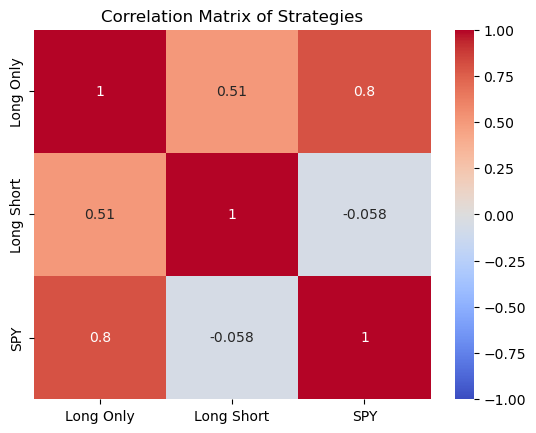

In [333]:
# Combine the three return series into one DataFrame
strategy_returns = pd.DataFrame({
    "Long Only": long_only_portfolio_returns,
    "Long Short": long_short_portfolio_returns,
    "SPY": spy_returns
})

# Compute and display the correlation matrix
correlation_matrix = strategy_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Strategies')
plt.show()


The long only strategy has a positive SPY Beta and a positive alpha while the long short strategy has a negative SPY beta and a negative alpha. As for the correlations, the long only and long short strategies are highly uncorrelated, with a correlation of -0.058, which is expected. The long only strategy is significantly more coreelated with SPY than the long short strategy, with a strong high correlation to SPY of 0.8.

#### 2.2

Estimate a multivariate LFD for both LO and LS against all the sector ETFs.

- Note that SHV is not a sector ETF but rather a money-market fund. Exclude it.

- Exclude SPY.

Report the same stats as in 2.1.



In [368]:
xlk_returns = sector_data['XLK']
xlk_returns.dropna(inplace=True)
xlk_returns.drop(xlk_returns.index[0], inplace=True)
xlk_returns = xlk_returns.pct_change().dropna()
xlk_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/1685459597.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlk_returns = xlk_returns.pct_change().dropna()


(521,)

In [369]:
xli_returns = sector_data['XLI']
xli_returns.dropna(inplace=True)
xli_returns.drop(xli_returns.index[0], inplace=True)
xli_returns = xli_returns.pct_change().dropna()
xli_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/176642729.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xli_returns = xli_returns.pct_change().dropna()


(521,)

In [370]:
xlf_returns = sector_data['XLF']
xlf_returns.dropna(inplace=True)
xlf_returns.drop(xlf_returns.index[0], inplace=True)
xlf_returns = xlf_returns.pct_change().dropna()
xlf_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/336919430.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlf_returns = xlf_returns.pct_change().dropna()


(521,)

In [371]:
xle_returns = sector_data['XLE']
xle_returns.dropna(inplace=True)
xle_returns.drop(xle_returns.index[0], inplace=True)
xle_returns = xle_returns.pct_change().dropna()
xle_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/1826248027.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xle_returns = xle_returns.pct_change().dropna()


(521,)

In [372]:
xly_returns = sector_data['XLY']
xly_returns.dropna(inplace=True)
xly_returns.drop(xly_returns.index[0], inplace=True)
xly_returns = xly_returns.pct_change().dropna()
xly_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/3893528840.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xly_returns = xly_returns.pct_change().dropna()


(521,)

In [373]:
xlb_returns = sector_data['XLB']
xlb_returns.dropna(inplace=True)
xlb_returns.drop(xlb_returns.index[0], inplace=True)
xlb_returns = xlb_returns.pct_change().dropna()
xlb_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2650365171.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlb_returns = xlb_returns.pct_change().dropna()


(521,)

In [374]:
xlv_returns = sector_data['XLV']
xlv_returns.dropna(inplace=True)
xlv_returns.drop(xlv_returns.index[0], inplace=True)
xlv_returns = xlv_returns.pct_change().dropna()
xlv_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/4278231127.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlv_returns = xlv_returns.pct_change().dropna()


(521,)

In [375]:
xlu_returns = sector_data['XLU']
xlu_returns.dropna(inplace=True)
xlu_returns.drop(xlu_returns.index[0], inplace=True)
xlu_returns = xlu_returns.pct_change().dropna()
xlu_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2806920436.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlu_returns = xlu_returns.pct_change().dropna()


(521,)

In [376]:
xlp_returns = sector_data['XLP']
xlp_returns.dropna(inplace=True)
xlp_returns.drop(xlp_returns.index[0], inplace=True)
xlp_returns = xlp_returns.pct_change().dropna()
xlp_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/99451996.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlp_returns = xlp_returns.pct_change().dropna()


(521,)

In [377]:
xlc_returns = sector_data['XLC']
xlc_returns.drop(xlc_returns.index[0], inplace=True)
xlc_returns.drop(xlc_returns.index[0], inplace=True)
xlc_returns = xlc_returns.pct_change().fillna(0)
xlc_returns.drop(xlc_returns.index[0], inplace=True)
xlc_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2686930466.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlc_returns = xlc_returns.pct_change().fillna(0)


(521,)

In [378]:
xlre_returns = sector_data['XLRE']
xlre_returns.drop(xlre_returns.index[0], inplace=True)
xlre_returns.drop(xlre_returns.index[0], inplace=True)
xlre_returns = xlre_returns.pct_change().fillna(0)
xlre_returns.drop(xlre_returns.index[0], inplace=True)
xlre_returns.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/2063380043.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xlre_returns = xlre_returns.pct_change().fillna(0)


(521,)

In [379]:
y = long_only_portfolio_returns
X = np.column_stack([xlk_returns, xli_returns, xlf_returns, xlc_returns, xlre_returns, xle_returns, xly_returns, xlb_returns, xlv_returns, xlu_returns, xlp_returns])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_
r_squared = model.score(X, y)
print("Long Only Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"XLK Beta: {beta[0]:.4f}")
print(f"XLI Beta: {beta[1]:.4f}")
print(f"XLF Beta: {beta[2]:.4f}")
print(f"XLC Beta: {beta[3]:.4f}")
print(f"XLRE Beta: {beta[4]:.4f}")
print(f"XLE Beta: {beta[5]:.4f}")
print(f"XLY Beta: {beta[6]:.4f}")
print(f"XLB Beta: {beta[7]:.4f}")
print(f"XLV Beta: {beta[8]:.4f}")
print(f"XLU Beta: {beta[9]:.4f}")
print(f"XLP Beta: {beta[10]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Only Strategy:
Annualized Alpha: 0.0302
XLK Beta: -0.0752
XLI Beta: 0.0659
XLF Beta: 0.1848
XLC Beta: 0.0490
XLRE Beta: 0.2196
XLE Beta: 0.1134
XLY Beta: -0.0160
XLB Beta: 0.0809
XLV Beta: -0.0507
XLU Beta: 0.1288
XLP Beta: 0.0335
R-squared: 0.9239


In [380]:
y = long_short_portfolio_returns
X = np.column_stack([xlk_returns, xli_returns, xlf_returns, xlc_returns, xlre_returns, xle_returns, xly_returns, xlb_returns, xlv_returns, xlu_returns, xlp_returns])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_
r_squared = model.score(X, y)
print("Long Short Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"XLK Beta: {beta[0]:.4f}")
print(f"XLI Beta: {beta[1]:.4f}")
print(f"XLF Beta: {beta[2]:.4f}")
print(f"XLC Beta: {beta[3]:.4f}")
print(f"XLRE Beta: {beta[4]:.4f}")
print(f"XLE Beta: {beta[5]:.4f}")
print(f"XLY Beta: {beta[6]:.4f}")
print(f"XLB Beta: {beta[7]:.4f}")
print(f"XLV Beta: {beta[8]:.4f}")
print(f"XLU Beta: {beta[9]:.4f}")
print(f"XLP Beta: {beta[10]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Short Strategy:
Annualized Alpha: 0.0098
XLK Beta: -0.2046
XLI Beta: -0.1056
XLF Beta: 0.1609
XLC Beta: 0.0415
XLRE Beta: 0.1723
XLE Beta: 0.1172
XLY Beta: -0.1048
XLB Beta: -0.0002
XLV Beta: -0.2128
XLU Beta: 0.1489
XLP Beta: 0.0426
R-squared: 0.6280


#### 2.3

Is your LO or LS implementation of the carry strategy neutral to sectors? To which sector does it have the largest exposure?

The long-only strategy has the largest exposure to XLRE (real estate) and XLF (financial). The long-short strategy has the largest exposure to XLV (healthcare) and XLK (technology). The strategies are not really neutral to sectors as some sectors have significantly higher weights than others.

#### 2.4

Construct an equally-weighted portfolio of the following tickers. Call this MAG. Estimate a LFD on both SPY and MAG. Do this for both the LO and LS strategies.

Report the stats from 2.1.

Comment on what you conclude from this regression.

In [386]:
mag = spx_data[['AAPL','MSFT','GOOG','AMZN','NVDA','META','TSLA']]
mag = mag.pct_change().dropna()
mag = mag.mean(axis=1)
mag.shape

/var/folders/4h/3bb3wscd33xgrr2xkd9kn6fr0000gn/T/ipykernel_89992/3103391012.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mag = mag.pct_change().dropna()


(521,)

In [387]:
y = long_only_portfolio_returns
X = np.column_stack([spy_returns, mag])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_
r_squared = model.score(X, y)
print("Long Only Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"SPY Beta: {beta[0]:.4f}")
print(f"MAG Beta: {beta[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Only Strategy:
Annualized Alpha: 0.0663
SPY Beta: 1.0787
MAG Beta: -0.3280
R-squared: 0.7634


In [388]:
y = long_short_portfolio_returns
X = np.column_stack([spy_returns, mag])
model = LinearRegression()
model.fit(X, y)
alpha = model.intercept_ * FREQ
beta = model.coef_
r_squared = model.score(X, y)
print("Long Short Strategy:")
print(f"Annualized Alpha: {alpha:.4f}")
print(f"SPY Beta: {beta[0]:.4f}")
print(f"MAG Beta: {beta[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

Long Short Strategy:
Annualized Alpha: 0.0411
SPY Beta: 0.3055
MAG Beta: -0.2637
R-squared: 0.2045


I notice that the R^2 for the long only strategy is very high, with MAG and SPY explaining 76% of the variance of the strategy. Both regressions have a positive SPY beta and a negative MAG beta.